In [7]:
using JLD2
using DynamicPolynomials
using TSSOS

function coef_range(obj)
    maximum(abs.(coefficients(obj)))/minimum(abs.(coefficients(obj)))
end

using Plots


function contour_obj(objective)

    function f(γ_val, ω_val)
        return objective(variables(objective) => (γ_val, ω_val))
    end
    
    w = range(-20, 10, length=1000)
    g = range(-3, 3, length=1000)

    z = @. f(g', w)

    contour(g, w, log.(z))
end


contour_obj (generic function with 1 method)

Consider polynomial objective

In [3]:
p = load_object("sym_objective.jld2")

0.0025619407060048964γ¹⁶ + 0.09961106280756547γ¹⁴ + 0.01085211928165149γ¹²ω² + 0.09800967417707061γ¹²ω + 1.5216143625452663γ¹² + 0.3164567195562115γ¹⁰ω² + 0.017238176018353403γ⁸ω⁴ + 2.874002283193299γ¹⁰ω + 0.31136923049166854γ⁸ω³ + 9.052355871074154γ¹⁰ + 4.6536325752370225γ⁸ω² + 0.3351195892292417γ⁶ω⁴ + 0.012169858960878275γ⁴ω⁶ + 28.81399976362663γ⁸ω + 6.086990132099648γ⁶ω³ + 0.32973206815555833γ⁴ω⁵ + 48.220038821162674γ⁸ + 37.86784220380396γ⁶ω² + 4.737018216102864γ⁴ω⁴ + 0.11829436396301793γ²ω⁶ + 0.003221892508450038ω⁸ + 105.29204441211577γ⁶ω + 40.18518746249525γ⁴ω³ + 3.222983597207745γ²ω⁵ + 0.1163926148584238ω⁷ + 42.31996073699868γ⁶ + 147.83781345752806γ⁴ω² + 29.949522630522637γ²ω⁴ + 1.604684607765997ω⁶ + 67.82434732573745γ⁴ω + 101.88441843970458γ²ω³ + 10.242292198031356ω⁵ + 19.543249967893853γ⁴ + 65.16083684360241γ²ω² + 28.288642418025862ω⁴ + 20.564044717002652γ²ω + 22.43120401097864ω³ + 3.9424110328005733γ² + 10.105548122829099ω² + 2.0328836149224587ω + 0.40325675930411353

Suspected minumum

In [4]:
variables(p)

2-element Vector{PolyVar{true}}:
 γ
 ω

Check the range of coefficients 

In [5]:
coef_range(p)

57705.4000941603

Ploting the function we can see it has three local minima 

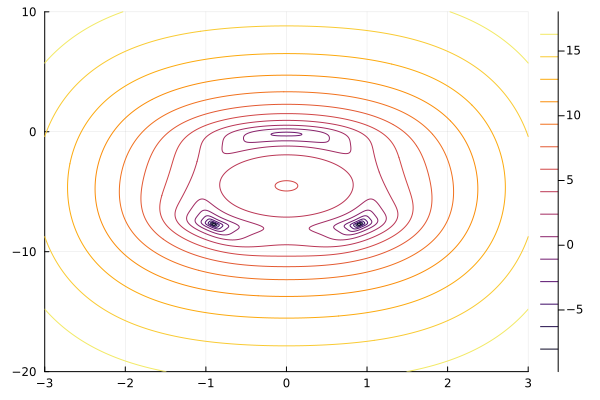

In [8]:
contour_obj(p)

TSSOS fails

In [9]:
using TSSOS

opt,sol,data = tssos_first(p, variables(p), solution=true, newton=false)

*********************************** TSSOS ***********************************
Version 1.0.0, developed by Jie Wang, 2020--2023
TSSOS is launching...


Starting to compute the block structure...


-----------------------------------------------------------------------------
The sizes of PSD blocks:
[25, 20]
[1, 1]
-----------------------------------------------------------------------------
Obtained the block structure. The maximal size of blocks is 25.


Assembling the SDP...
There are 83 affine constraints.


Solving the SDP...


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 83              
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 1               
  Matrix variables       : 3 (scalarized: 541)
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes              : 1               
Lin. dep.  - dual attempts          : 0        

optimum = 0.2616625440691823


Global optimality certified with relative optimality gap 0.000002%!


(0.2616625440691823, [1.1269947938780652e-16, -0.17447505518967343], TSSOS.upop_data(2, 0, PolyVar{true}[γ, ω], 0.0025619407060048964γ¹⁶ + 0.09961106280756547γ¹⁴ + 0.01085211928165149γ¹²ω² + 0.09800967417707061γ¹²ω + 1.5216143625452663γ¹² + 0.3164567195562115γ¹⁰ω² + 0.017238176018353403γ⁸ω⁴ + 2.874002283193299γ¹⁰ω + 0.31136923049166854γ⁸ω³ + 9.052355871074154γ¹⁰ + 4.6536325752370225γ⁸ω² + 0.3351195892292417γ⁶ω⁴ + 0.012169858960878275γ⁴ω⁶ + 28.81399976362663γ⁸ω + 6.086990132099648γ⁶ω³ + 0.32973206815555833γ⁴ω⁵ + 48.220038821162674γ⁸ + 37.86784220380396γ⁶ω² + 4.737018216102864γ⁴ω⁴ + 0.11829436396301793γ²ω⁶ + 0.003221892508450038ω⁸ + 105.29204441211577γ⁶ω + 40.18518746249525γ⁴ω³ + 3.222983597207745γ²ω⁵ + 0.1163926148584238ω⁷ + 42.31996073699868γ⁶ + 147.83781345752806γ⁴ω² + 29.949522630522637γ²ω⁴ + 1.604684607765997ω⁶ + 67.82434732573745γ⁴ω + 101.88441843970458γ²ω³ + 10.242292198031356ω⁵ + 19.543249967893853γ⁴ + 65.16083684360241γ²ω² + 28.288642418025862ω⁴ + 20.564044717002652γ²ω + 22.4312

In [10]:
γᵗˢˢᵒˢ, ωᵗˢˢᵒˢ = sol

2-element Vector{Float64}:
  1.1269947938780652e-16
 -0.17447505518967343

In [12]:
using Optim

initial_point = [-1.0, -10.0]
result = optimize(p, initial_point, BFGS()) 

 * Status: failure (line search failed)

 * Candidate solution
    Final objective value:     5.442028e-05

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 7.42e-07 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    188
    f(x) calls:    1228
    ∇f(x) calls:   1228


In [17]:
γᵇᶠᵍˢ, ωᵇᶠᵍˢ = Optim.minimizer(result)

2-element Vector{Float64}:
 -0.9003418095148893
 -7.7286725628140225

In [16]:
p(variables(p) => (γᵇᶠᵍˢ, ωᵇᶠᵍˢ))

5.4420278060074434e-5

In [18]:
p(variables(p) => (γᵗˢˢᵒˢ, ωᵗˢˢᵒˢ))

0.2616625604758308